<a href="https://colab.research.google.com/github/harshit97212/Predict-Air-Quality-Level-1/blob/main/AIMSE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.35
Precision: 0.32
Recall: 0.35
F1 Score: 0.32


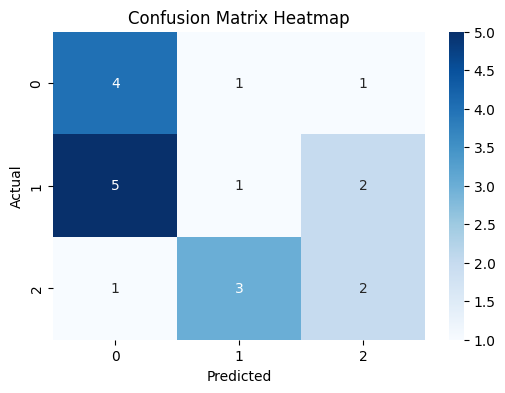

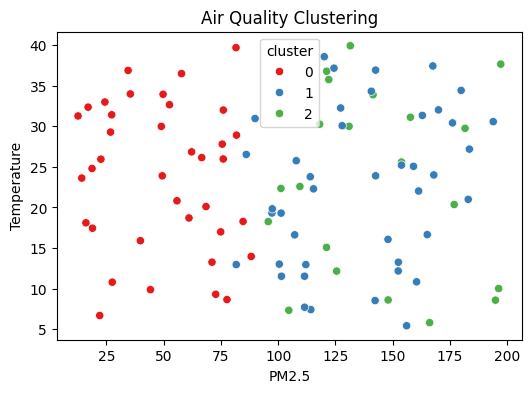

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("airquality.csv")

# Encode categorical variables ('quality_level')
label_encoder = LabelEncoder()
df["quality_level"] = label_encoder.fit_transform(df["quality_level"])  # Target variable

# Feature selection
X = df[["pm25", "no2", "temperature"]]
y = df["quality_level"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classification model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["pm25"], y=df["temperature"], hue=df["cluster"], palette="Set1")
plt.xlabel("PM2.5")
plt.ylabel("Temperature")
plt.title("Air Quality Clustering")
plt.show()